# Compute enmeble mean and create detrended arrays

In [10]:
import numpy as np          # fundamental package for scientific computing
import glob                 # return all file paths that match a specific pattern
import matplotlib.pyplot as plt 
import os                   # to interact with the operating system

files = glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy')

In [11]:
files

['/home/innag3580/phase1_CONDA/timeseries/OSNAPwest_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/bsf_min_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dept_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/maxi_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/OSNAPeast_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/spgy_dens_time_series.npy',
 '/home/innag3580/phase1_CONDA/timeseries/rapi_dept_time_series.npy']

In [19]:
for i in range(len(files)):
    # open file
    data = np.load(files[i])
    
    ## create demeaned arrays
    # calculate ensemble mean
    ense_mean = np.nanmean(data, axis=1)
    # create storage array with same shape as data
    data_demean = np.zeros_like(data)
    #data_demean = np.full_like(data, np.nan)
    # subtract ensemble mean from each member
    data_demean = data - ense_mean[:, np.newaxis]
    
    ## to deal with weird situation below
    # Find the indices of NaN values in original array
    nan_indices = np.where(np.isnan(data))
    # Set to NaN in final array at locations of NaN in orginal array
    data_demean[nan_indices] = np.nan

    # save demeaned time series
    # np.save('timeseries/demeaned'+files[i][:-15][10:]+'demeaned_series', data_demean)
    
    # save ensemble mean time series
    np.save(os.path.expanduser('~/phase1_CONDA/')+'timeseries/ensemble_mean_'+files[i][40:-16], ense_mean)


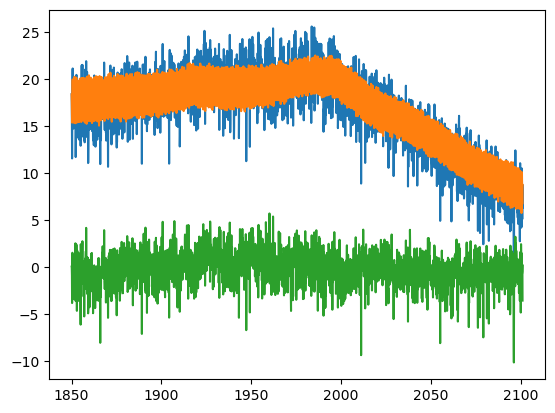

In [24]:
time = np.arange(1850,1850+3012/12,1/12)
plt.plot(time, data[:,8])
plt.plot(time, ense_mean)
plt.plot(time, data[:,8]-ense_mean)
#plt.plot(time, data_demean)
plt.show()

# Inspect change points

In [21]:
time_series = np.load('timeseries/OSNAPwest_demeaned_series.npy')
change_points = np.load('OSNAPwest_deme_change_points.npz')
time = np.arange(1850,1850+(len(time_series[:, 0])),1)


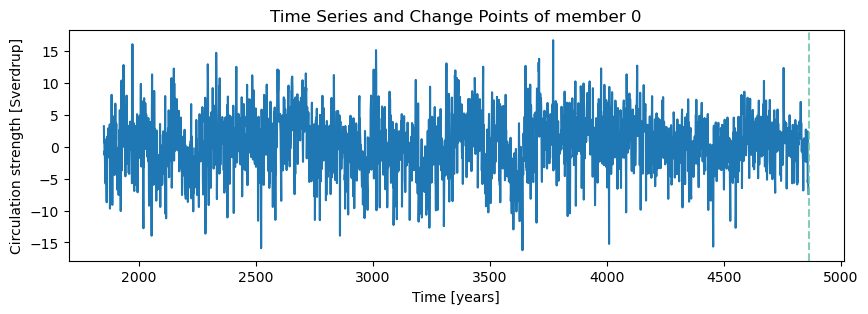

KeyError: 'array_1 is not a file in the archive'

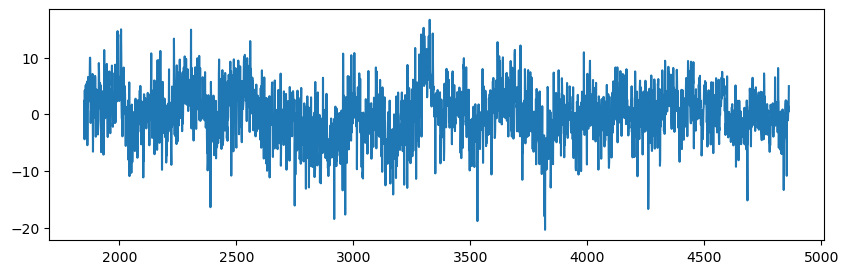

In [22]:
for i in range(len(time_series)):

    plt.figure(figsize=(10, 3))
    plt.plot(time, time_series[:, i])
    for idx in change_points[f"array_{i}"]:
        plt.axvline(x=(1850+idx), color='#66c2a5', linestyle='--', alpha=0.8)
    
    plt.xlabel('Time [years]')
    plt.ylabel('Circulation strength [Sverdrup]')
    plt.title(f'Time Series and Change Points of member {i}')
    plt.show()

In [23]:
len_time = 3012 # length of time series
intervall = 502 # to reduce compation time

len_time/intervall

6.0

In [24]:
502/2

251.0